In [45]:
import numpy as np
import scipy.io.wavfile as wavf
import matplotlib.pyplot as pp
from scipy import signal
import librosa
from librosa import display
import matplotlib.pyplot as plt
import pywt
import scipy
import os
import soundfile as sf
import sounddevice as sd
from scipy import fftpack

In [46]:
myfile = np.fromfile('data.bin', dtype='uint16')
print(myfile.shape)

(96012,)


In [47]:
myfile = np.delete(myfile,[0,1,2,3,4,5,6,7,8,9,10,11])
myfile = myfile.reshape(24000,4)
print(myfile.shape)

(24000, 4)


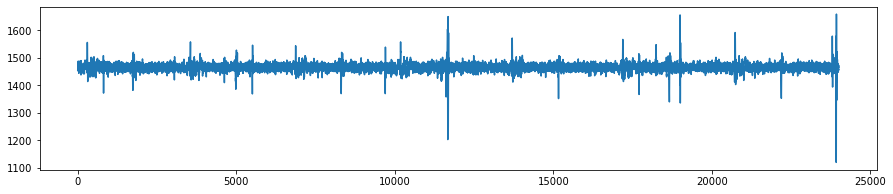

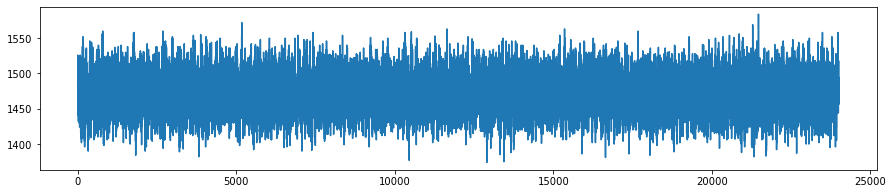

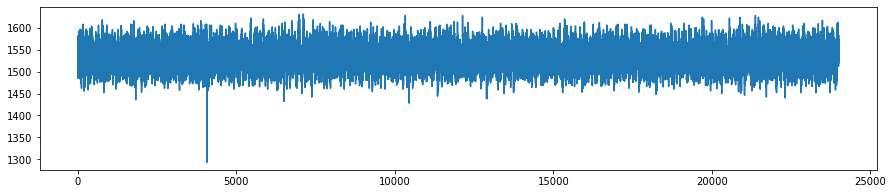

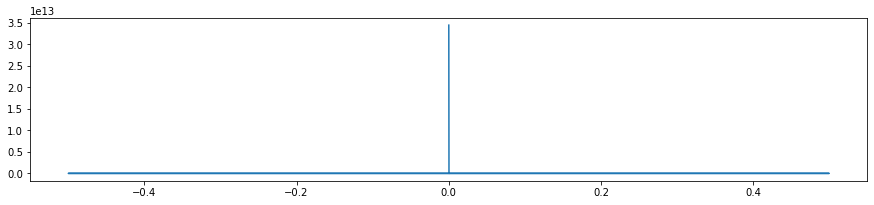

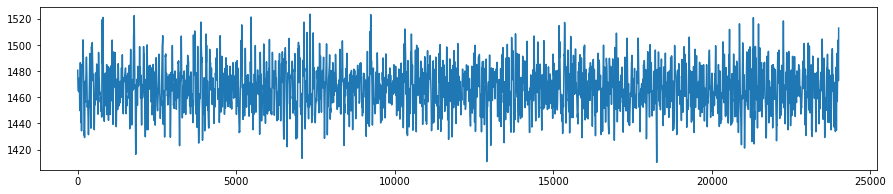

In [48]:
pp.figure(figsize=(15,3))
pp.plot(myfile[:,1])
pp.show()
pp.figure(figsize=(15,3))
pp.plot(myfile[:,2])
pp.show()
pp.figure(figsize=(15,3))
pp.plot(myfile[:,3])
pp.show()
fftarray = myfile[2000:6000,2]
fftResult = np.fft.fft(fftarray)
freq = np.fft.fftfreq(4000)
pp.figure(figsize=(15,3))
pp.plot(freq, fftResult.real**2 + fftResult.imag**2)
pp.show()
b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, myfile[:,2])
pp.figure(figsize=(15,3))
pp.plot(output, label='filtered')
pp.show()
output=output/1000
fs = 5125
wavf.write("buttered.wav", fs, output)

In [23]:
samples = np.delete(myfile,[0,1,3],axis=1)
samples=samples.flatten()
samples2 = np.delete(myfile,[0,2,3],axis=1)
samples2=samples2.flatten()
samples3 = np.delete(myfile,[0,1,2],axis=1)
samples3=samples3.flatten()
noiseRed = samples - np.average(samples2)

In [24]:
samples=samples/1000
samples = samples - np.mean(samples)
samples = samples.round(2)
wavf.write('outOriginal.wav', fs, samples)
samples2=samples2/1000
wavf.write('outNoise1.wav', fs, samples2)
samples3=samples3/1000
wavf.write('outNoise2.wav', fs, samples3)

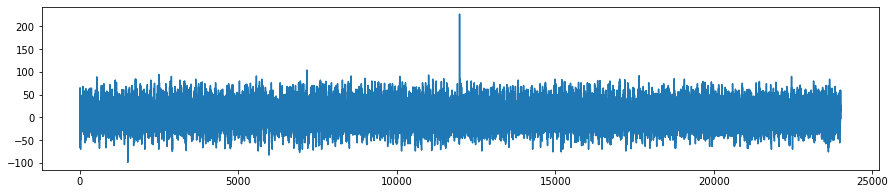

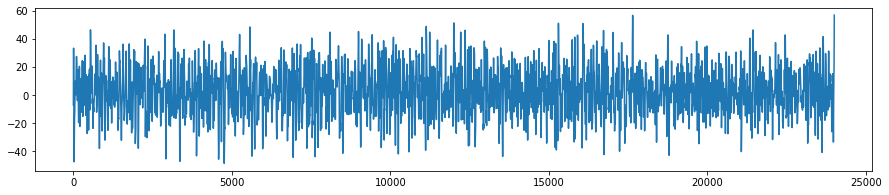

In [25]:
pp.figure(figsize=(15,3))
pp.plot(noiseRed)
pp.show()
b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, noiseRed)
pp.figure(figsize=(15,3))
pp.plot(output, label='filtered')
pp.show()
output=output/100
#output=output-np.average(output)
wavf.write("reduced.wav", fs, output)

Text(0, 0.5, 'Power')

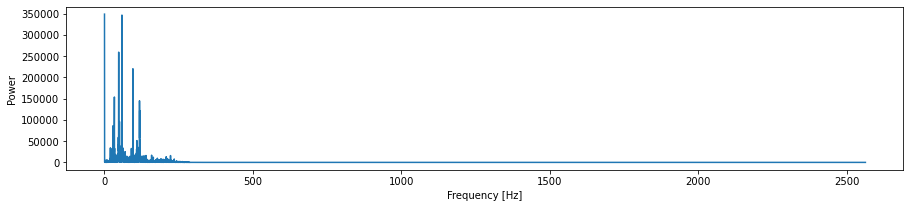

In [26]:
sr = fs
time_step = 1/sr
sig = output
time_vec = np.arange(0, len(sig)/sr, 1/sr)
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
plt.figure(figsize=(15, 3))
plt.plot(sample_freq[:len(sample_freq)//2], power[:len(sample_freq)//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

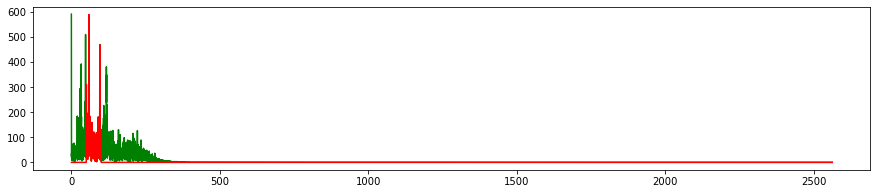

C:\Users\ammar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


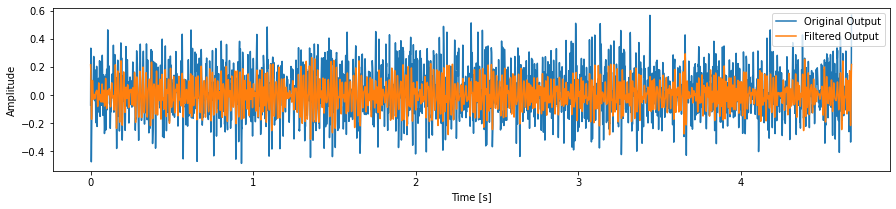

In [27]:
ul = 100
ll = 50
high_freq_fft = sig_fft.copy()
plt.figure(figsize=(15, 3))
plt.plot( sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'green')
high_freq_fft[np.abs(sample_freq) > ul] = 0
high_freq_fft[np.abs(sample_freq) < ll] = 0
plt.plot(sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'red')
plt.show()
filtered_output = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(15, 3))
plt.plot(time_vec, sig, label='Original Output')
plt.plot(time_vec, filtered_output, label='Filtered Output')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
sf.write('reducedFFT.wav', filtered_output.real*3, sr, format='wav')

Text(0, 0.5, 'Power')

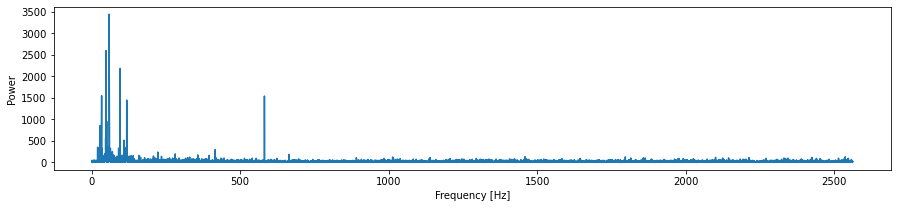

In [28]:
sig = samples
time_vec = np.arange(0, len(sig)/sr, 1/sr)
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
plt.figure(figsize=(15, 3))
plt.plot(sample_freq[:len(sample_freq)//2], power[:len(sample_freq)//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

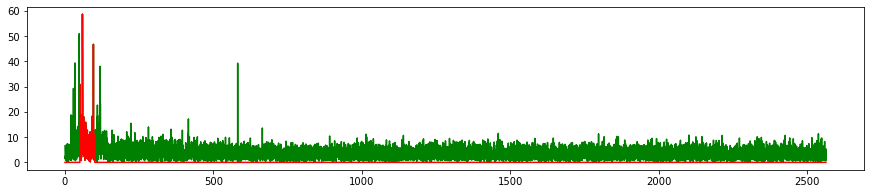

C:\Users\ammar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


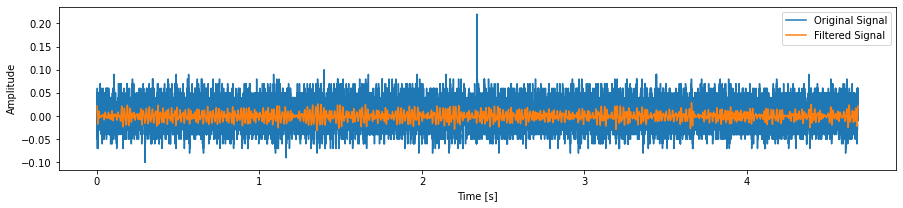

In [29]:
high_freq_fft = sig_fft.copy()
plt.figure(figsize=(15, 3))
plt.plot( sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'green')
high_freq_fft[np.abs(sample_freq) > ul] = 0
high_freq_fft[np.abs(sample_freq) < ll] = 0
plt.plot(sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'red')
plt.show()
filtered_sig = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(15, 3))
plt.plot(time_vec, sig, label='Original Signal')
plt.plot(time_vec, filtered_sig, label='Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
sf.write('FFT.wav', filtered_sig.real*3, sr, format='wav')

Text(0, 0.5, 'Power')

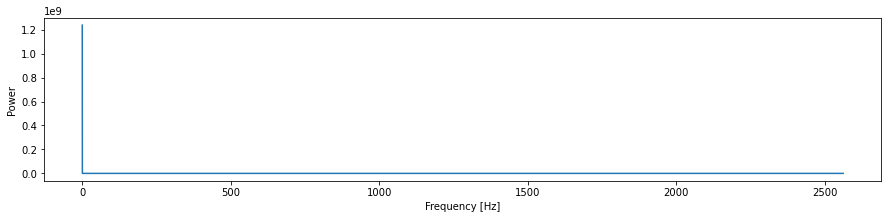

In [30]:
sig = samples2
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
plt.figure(figsize=(15, 3))
plt.plot(sample_freq[:len(sample_freq)//2], power[:len(sample_freq)//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

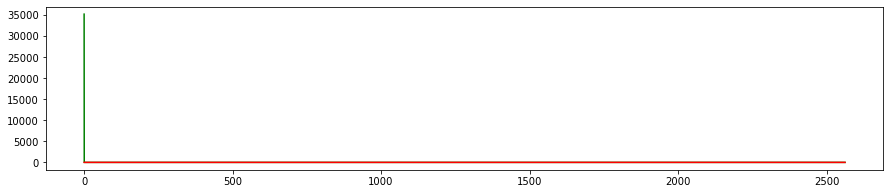

C:\Users\ammar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


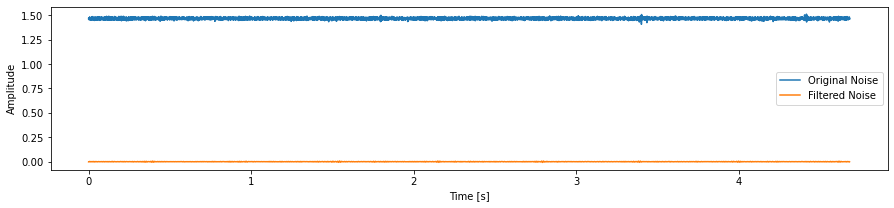

In [31]:
high_freq_fft = sig_fft.copy()
plt.figure(figsize=(15, 3))
plt.plot( sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'green')
high_freq_fft[np.abs(sample_freq) > ul] = 0
high_freq_fft[np.abs(sample_freq) < ll] = 0
plt.plot(sample_freq[:len(sample_freq)//2], np.abs(high_freq_fft[:len(sample_freq)//2]), 'red')
plt.show()
filtered_sig2 = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(15, 3))
plt.plot(time_vec, sig, label='Original Noise')
plt.plot(time_vec, filtered_sig2, label='Filtered Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
sf.write('FFTNoise.wav', filtered_sig2.real*3, sr, format='wav')

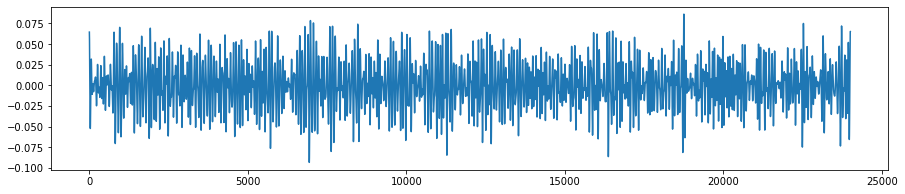

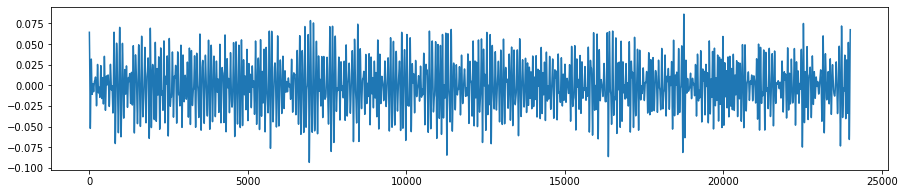

In [32]:
noiseRed = filtered_sig.real*3 - np.average(filtered_sig2.real*3)
pp.figure(figsize=(15,3))
pp.plot(noiseRed)
pp.show()
b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, noiseRed)
pp.figure(figsize=(15,3))
pp.plot(output, label='filtered')
pp.show()
output=output/100
#output=output-np.average(output)
wavf.write("FFTReduced.wav", fs, output*3)